# Ultimate Texas Hold'em Simulation
## m Days with n Games per Day

In [37]:
from ultimatepoker import Game
import sys
import pandas
from random import seed
from random import gauss

import matplotlib.pyplot as plt

In [28]:
n_games_per_day = 400
m_days = 10000

In [29]:
bet_mean = 50
bet_std = 0

In [30]:
daily_result = pandas.DataFrame(columns=[
    'GameNr',
    'PlayerCards',
    'DealerCards',
    'CommunityCards',
    'PlayerHand',
    'DealerHand',
    'AnteBet',
    'BlindBet',
    'PlayBet',
    'TripsBet',
    'PlayerGain',
    'PlayerTotalGain',
    'PlayerTotalBet'
], index=range(1, (n_games_per_day + 1)))

In [ ]:
total_per_day = pandas.DataFrame(columns=[
    'PlayerTotalGain',
    'PlayerTotalBet',
    'PlayerMaxGain'
], index=range(1, (m_days + 1)))

In [31]:
seed(42)
for cur_day in range(m_days):
    dailyGain = 0
    dailyBet = 0
    
    for cur_game in range(n_games_per_day):
        bet_size = gauss(bet_mean, bet_std)
        
        game = Game(bet_size, False)
        gain, bet = game.playGame()
        
        daily_result['GameNr'][cur_game + 1] = cur_game
        
        daily_result['PlayerCards'][cur_game + 1] = str(game._player[0]) + ', ' + str(game._player[1])
        daily_result['DealerCards'][cur_game + 1] = str(game._dealer[0]) + ', ' + str(game._dealer[1])
        daily_result['CommunityCards'][cur_game + 1] = str(game._community[0]) + ', ' + \
                                                str(game._community[1]) + ', ' + \
                                                str(game._community[2]) + ', ' + \
                                                str(game._community[3]) + ', ' + \
                                                str(game._community[4])
        
        daily_result['PlayerHand'][cur_game + 1] = str(game._playerHand)
        daily_result['DealerHand'][cur_game + 1] = str(game._dealerHand)
        
        daily_result['AnteBet'][cur_game + 1] = game._bet.ante
        daily_result['BlindBet'][cur_game + 1] = game._bet.blind
        daily_result['PlayBet'][cur_game + 1] = game._bet.play
        daily_result['TripsBet'][cur_game + 1] = game._bet.trips
        
        dailyGain += gain
        dailyBet += bet
        
        daily_result['PlayerGain'][cur_game + 1] = gain
        
        daily_result['PlayerTotalGain'][cur_game + 1] = dailyGain
        daily_result['PlayerTotalBet'][cur_game + 1] = dailyBet
    
    total_per_day['PlayerTotalGain'][cur_day + 1] = dailyGain
    total_per_day['PlayerTotalBet'][cur_day + 1] = dailyBet
    total_per_day['PlayerMaxGain'][cur_day + 1] = max(daily_result['PlayerTotalGeain'])

In [32]:
daily_result

,GameNr,PlayerCards,DealerCards,CommunityCards,PlayerHand,DealerHand,AnteBet,BlindBet,PlayBet,TripsBet,PlayerGain,PlayerTotalGain,PlayerTotalBet
1,0,"3 of Clubs, Q of Clubs","A of Diamond, 9 of Hearts","A of Spade, K of Spade, K of Clubs, K of Diamo...","[K of Spade, K of Clubs, K of Diamond, Q of Cl...","[K of Spade, K of Clubs, K of Diamond, A of Di...",50.0,50.0,50.0,50.0,0.0,0.0,200.0
2,1,"9 of Diamond, Q of Clubs","J of Hearts, 3 of Spade","9 of Spade, 5 of Diamond, 10 of Clubs, 10 of D...","[9 of Diamond, 9 of Spade, 10 of Clubs, 10 of ...","[10 of Clubs, 10 of Diamond, 7 of Spade, 9 of ...",50.0,50.0,100.0,50.0,100.0,100.0,450.0
3,2,"10 of Hearts, Q of Diamond","2 of Spade, 3 of Clubs","5 of Clubs, 4 of Diamond, J of Clubs, 6 of Spa...","[6 of Spade, 8 of Diamond, 10 of Hearts, J of ...","[2 of Spade, 3 of Clubs, 4 of Diamond, 5 of Cl...",50.0,50.0,200.0,50.0,-350.0,-250.0,800.0
4,3,"9 of Spade, 2 of Diamond","K of Hearts, 5 of Diamond","K of Spade, J of Spade, 4 of Hearts, 5 of Spad...","[4 of Hearts, 5 of Spade, 9 of Spade, J of Spa...","[K of Hearts, K of Spade, 5 of Diamond, 5 of S...",50.0,50.0,0.0,50.0,-150.0,-400.0,950.0
5,4,"8 of Clubs, J of Hearts","A of Clubs, 10 of Clubs","4 of Diamond, K of Diamond, 6 of Spade, 3 of S...","[J of Hearts, J of Clubs, 6 of Spade, 8 of Clu...","[6 of Spade, 10 of Clubs, J of Clubs, K of Dia...",50.0,50.0,50.0,50.0,0.0,-400.0,1150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,245,"10 of Diamond, K of Spade","A of Diamond, 4 of Hearts","10 of Hearts, Q of Diamond, 9 of Clubs, 6 of H...","[9 of Clubs, 10 of Diamond, J of Hearts, Q of ...","[9 of Clubs, 10 of Hearts, J of Hearts, Q of D...",50.0,50.0,200.0,50.0,450.0,6700.0,60000.0
247,246,"6 of Hearts, 6 of Spade","K of Spade, 4 of Hearts","J of Clubs, 10 of Clubs, K of Clubs, A of Spad...","[6 of Hearts, 6 of Spade, J of Clubs, K of Clu...","[K of Spade, K of Clubs, 10 of Clubs, J of Clu...",50.0,50.0,0.0,50.0,-150.0,6550.0,60150.0
248,247,"8 of Hearts, J of Spade","A of Spade, 3 of Spade","4 of Clubs, 3 of Clubs, 9 of Spade, 10 of Spad...","[8 of Hearts, 9 of Spade, 10 of Spade, J of Sp...","[3 of Spade, 3 of Clubs, 10 of Spade, Q of Hea...",50.0,50.0,50.0,50.0,350.0,6900.0,60350.0
249,248,"Q of Clubs, 2 of Diamond","5 of Spade, 3 of Diamond","J of Spade, K of Diamond, 4 of Spade, A of Clu...","[7 of Spade, J of Spade, Q of Clubs, K of Diam...","[5 of Spade, 7 of Spade, J of Spade, K of Diam...",50.0,50.0,0.0,50.0,-100.0,6800.0,60500.0


In [34]:
total_per_day

,PlayerTotalGain,PlayerTotalBet
1,-8475.0,58100.0
2,275.0,60450.0
3,950.0,61750.0
4,3900.0,59050.0
5,-2075.0,61450.0
...,...,...
9996,2175.0,61800.0
9997,4075.0,58400.0
9998,-750.0,60850.0
9999,2525.0,60100.0


Text(0, 0.5, 'Frequency')

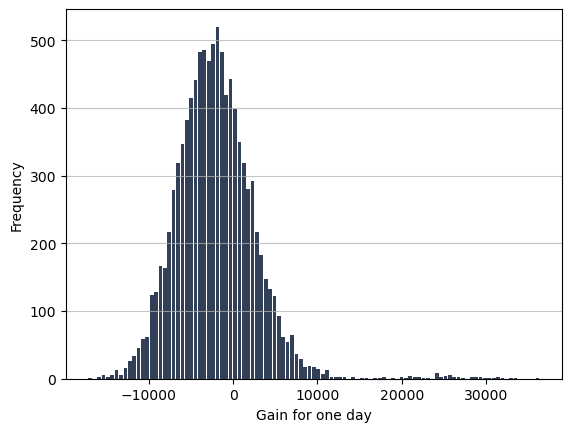

In [48]:
n, bins, patches = plt.hist(x=total_per_day['PlayerTotalGain'],
                           bins='auto',
                           color='#1A2B44', # Night Blue: #1A2B44 St. Moritz Gold: #B79164
                           alpha=0.9,
                           rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Player gain for one day')
plt.ylabel('Frequency')

In [49]:
max(total_per_day['PlayerTotalGain'])

36325.0

In [64]:
daily_result.iloc[247]

GameNr                                                           247
PlayerCards                                  8 of Hearts, J of Spade
DealerCards                                   A of Spade, 3 of Spade
CommunityCards     4 of Clubs, 3 of Clubs, 9 of Spade, 10 of Spad...
PlayerHand         [8 of Hearts, 9 of Spade, 10 of Spade, J of Sp...
DealerHand         [3 of Spade, 3 of Clubs, 10 of Spade, Q of Hea...
AnteBet                                                         50.0
BlindBet                                                        50.0
PlayBet                                                         50.0
TripsBet                                                        50.0
PlayerGain                                                     350.0
PlayerTotalGain                                               6900.0
PlayerTotalBet                                               60350.0
Name: 248, dtype: object

In [62]:
daily_result['PlayerCards'][248]

'8 of Hearts, J of Spade'

In [63]:
daily_result['DealerCards'][248]

'A of Spade, 3 of Spade'

In [65]:
daily_result['CommunityCards'][248]

'4 of Clubs, 3 of Clubs, 9 of Spade, 10 of Spade, Q of Hearts'

In [58]:
daily_result['PlayerHand'][248]

'[8 of Hearts, 9 of Spade, 10 of Spade, J of Spade, Q of Hearts] (Type: STRAIGHT)'

In [66]:
daily_result['DealerHand'][248]

'[3 of Spade, 3 of Clubs, 10 of Spade, Q of Hearts, A of Spade] (Type: PAIR)'